In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowdflower/twitter-airline-sentiment")

print("Path to dataset files:", path)

100%|██████████| 2.55M/2.55M [00:00<00:00, 87.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/crowdflower/twitter-airline-sentiment/versions/4


In [ ]:
df= pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
print(df.shape)

(14640, 15)


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
df['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])
df['airline_sentiment']

,airline_sentiment
0,1
1,2
2,1
3,0
4,0
...,...
14635,2
14636,0
14637,1
14638,0


In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,2,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df.insert(0, 'id', range(1, len(df) + 1))
df.head(3)

,id,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,1,570306133677760513,1,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,2,570301130888122368,2,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,3,570301083672813571,1,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [ ]:
df= df.head(500)
df.shape

(500, 16)

<Axes: title={'center': 'count of reviews'}, xlabel='airline_sentiment'>

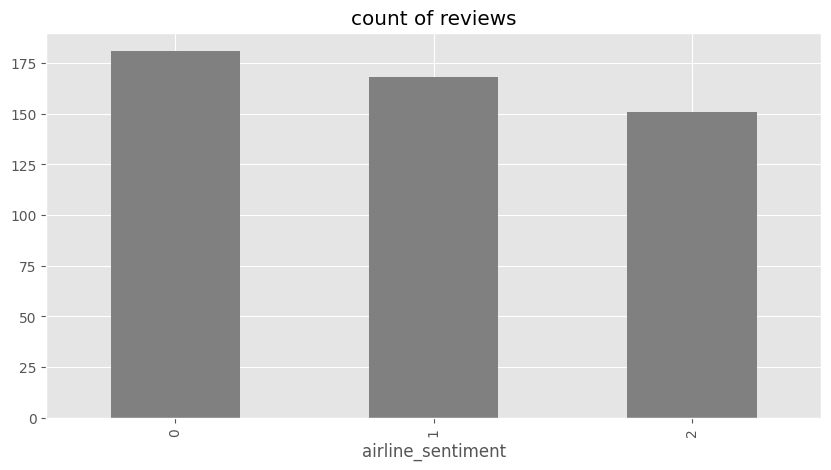

In [ ]:
df['airline_sentiment'].value_counts().sort_index().plot(kind='bar', title='count of reviews', figsize=(10,5), color='gray')

In [ ]:
checking_demo= df['text'][55]

In [ ]:
print(checking_demo)

@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!


In [ ]:
tokens= nltk.word_tokenize(checking_demo)
tokens[:10]

['@', 'VirginAmerica', 'hi', '!', 'i', "'m", 'so', 'excited', 'about', 'your']

In [ ]:
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('@', 'NN'),
 ('VirginAmerica', 'NNP'),
 ('hi', 'NN'),
 ('!', '.'),
 ('i', 'NN'),
 ("'m", 'VBP'),
 ('so', 'RB'),
 ('excited', 'JJ'),
 ('about', 'IN'),
 ('your', 'PRP$')]

In [ ]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  @/NN
  (ORGANIZATION VirginAmerica/NNP)
  hi/NN
  !/.
  i/NN
  'm/VBP
  so/RB
  excited/JJ
  about/IN
  your/PRP$
  $/$
  99/CD
  LGA-/NNP
  &/CC
  gt/NN
  ;/:
  (ORGANIZATION DAL/NNP)
  deal-/NN
  but/CC
  i/JJ
  've/VBP
  been/VBN
  trying/VBG
  2/CD
  book/NN
  since/IN
  last/JJ
  week/NN
  &/CC
  amp/NN
  ;/:
  the/DT
  page/NN
  never/RB
  loads/VBZ
  ./.
  thx/NN
  !/.)


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
 nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia= SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so astonished')

{'neg': 0.0, 'neu': 0.409, 'pos': 0.591, 'compound': 0.4391}

In [ ]:
sia.polarity_scores(checking_demo)

{'neg': 0.119, 'neu': 0.806, 'pos': 0.075, 'compound': -0.2939}

In [ ]:
result = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
  text= row['text']
  myid= row['id']
  result[myid]= sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders= pd.DataFrame(result).T
vaders= vaders.reset_index().rename(columns= {'index': 'id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


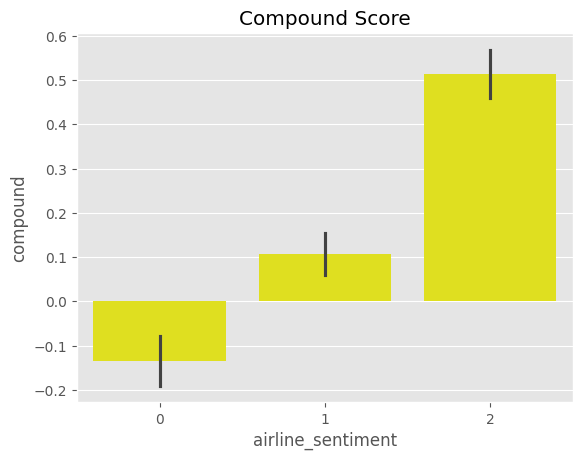

In [ ]:
ax= sns.barplot(data=vaders, x='airline_sentiment', y='compound', color= 'yellow')
ax.set_title('Compound Score')
plt.show()

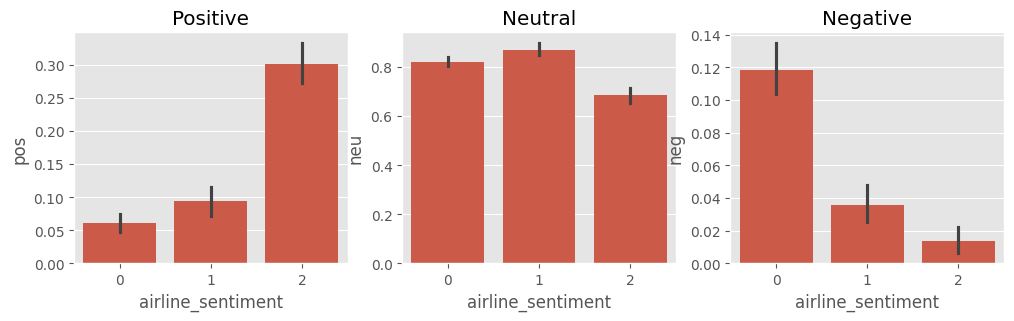

In [ ]:
fig, axs= plt.subplots(1,3, figsize= (12,3))
sns.barplot(data= vaders, x='airline_sentiment', y='pos', ax= axs[0])
sns.barplot(data= vaders, x='airline_sentiment', y='neu', ax= axs[1])
sns.barplot(data= vaders, x='airline_sentiment', y='neg', ax= axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

**Roberta** **Model**

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer= AutoTokenizer.from_pretrained(MODEL)
model= AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
print(checking_demo)
sia.polarity_scores(checking_demo)

@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!


{'neg': 0.119, 'neu': 0.806, 'pos': 0.075, 'compound': -0.2939}

In [ ]:
encoded_text= tokenizer(checking_demo, return_tensors='pt')
output= model(**encoded_text)
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict= {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2],
}
print(scores_dict)

{'roberta_neg': np.float32(0.004268101), 'roberta_neu': np.float32(0.015744323), 'roberta_pos': np.float32(0.9799875)}


In [ ]:
def polarity_scores_roberta(checking_demo):
  encoded_text= tokenizer(checking_demo, return_tensors='pt')
  output= model(**encoded_text)
  scores= output[0][0].detach().numpy()
  scores= softmax(scores)
  scores_dict= {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2],
  }
  return scores_dict

In [ ]:
result = {}
for i, row in tqdm(df.iterrows(), total= len(df)):
  try:
      text= row['text']
      myid= row['id']
      vader_result= sia.polarity_scores(text)

      vader_result_rename ={}
      for key, value in vader_result.items():
          vader_result_rename[f"vader_{key}"]= value

      roberta_result = polarity_scores_roberta(text)
      both= {**vader_result, **roberta_result}
      result[myid] = both
  except RuntimeError:
      print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
res_df = pd.DataFrame(result).T
res_df = res_df.reset_index().rename(columns={'index':'id'})
res_df = res_df.merge(df, how='left')

In [ ]:
res_df.head()

,id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,tweet_id,airline_sentiment,...,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,1,0.000,1.000,0.0,0.0000,0.153647,0.800411,0.045942,570306133677760513,1,...,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,2,0.000,1.000,0.0,0.0000,0.829640,0.151273,0.019087,570301130888122368,2,...,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,3,0.000,1.000,0.0,0.0000,0.326381,0.542418,0.131201,570301083672813571,1,...,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,4,0.246,0.754,0.0,-0.5984,0.902390,0.090954,0.006657,570301031407624196,0,...,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5,0.321,0.679,0.0,-0.5829,0.893211,0.095797,0.010992,570300817074462722,0,...,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Compare Scores of Vader and Roberta

In [ ]:
res_df.columns

Index(['id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'tweet_id', 'airline_sentiment',
       'airline_sentiment_confidence', 'negativereason',
       'negativereason_confidence', 'airline', 'airline_sentiment_gold',
       'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
res_df.shape

(500, 23)

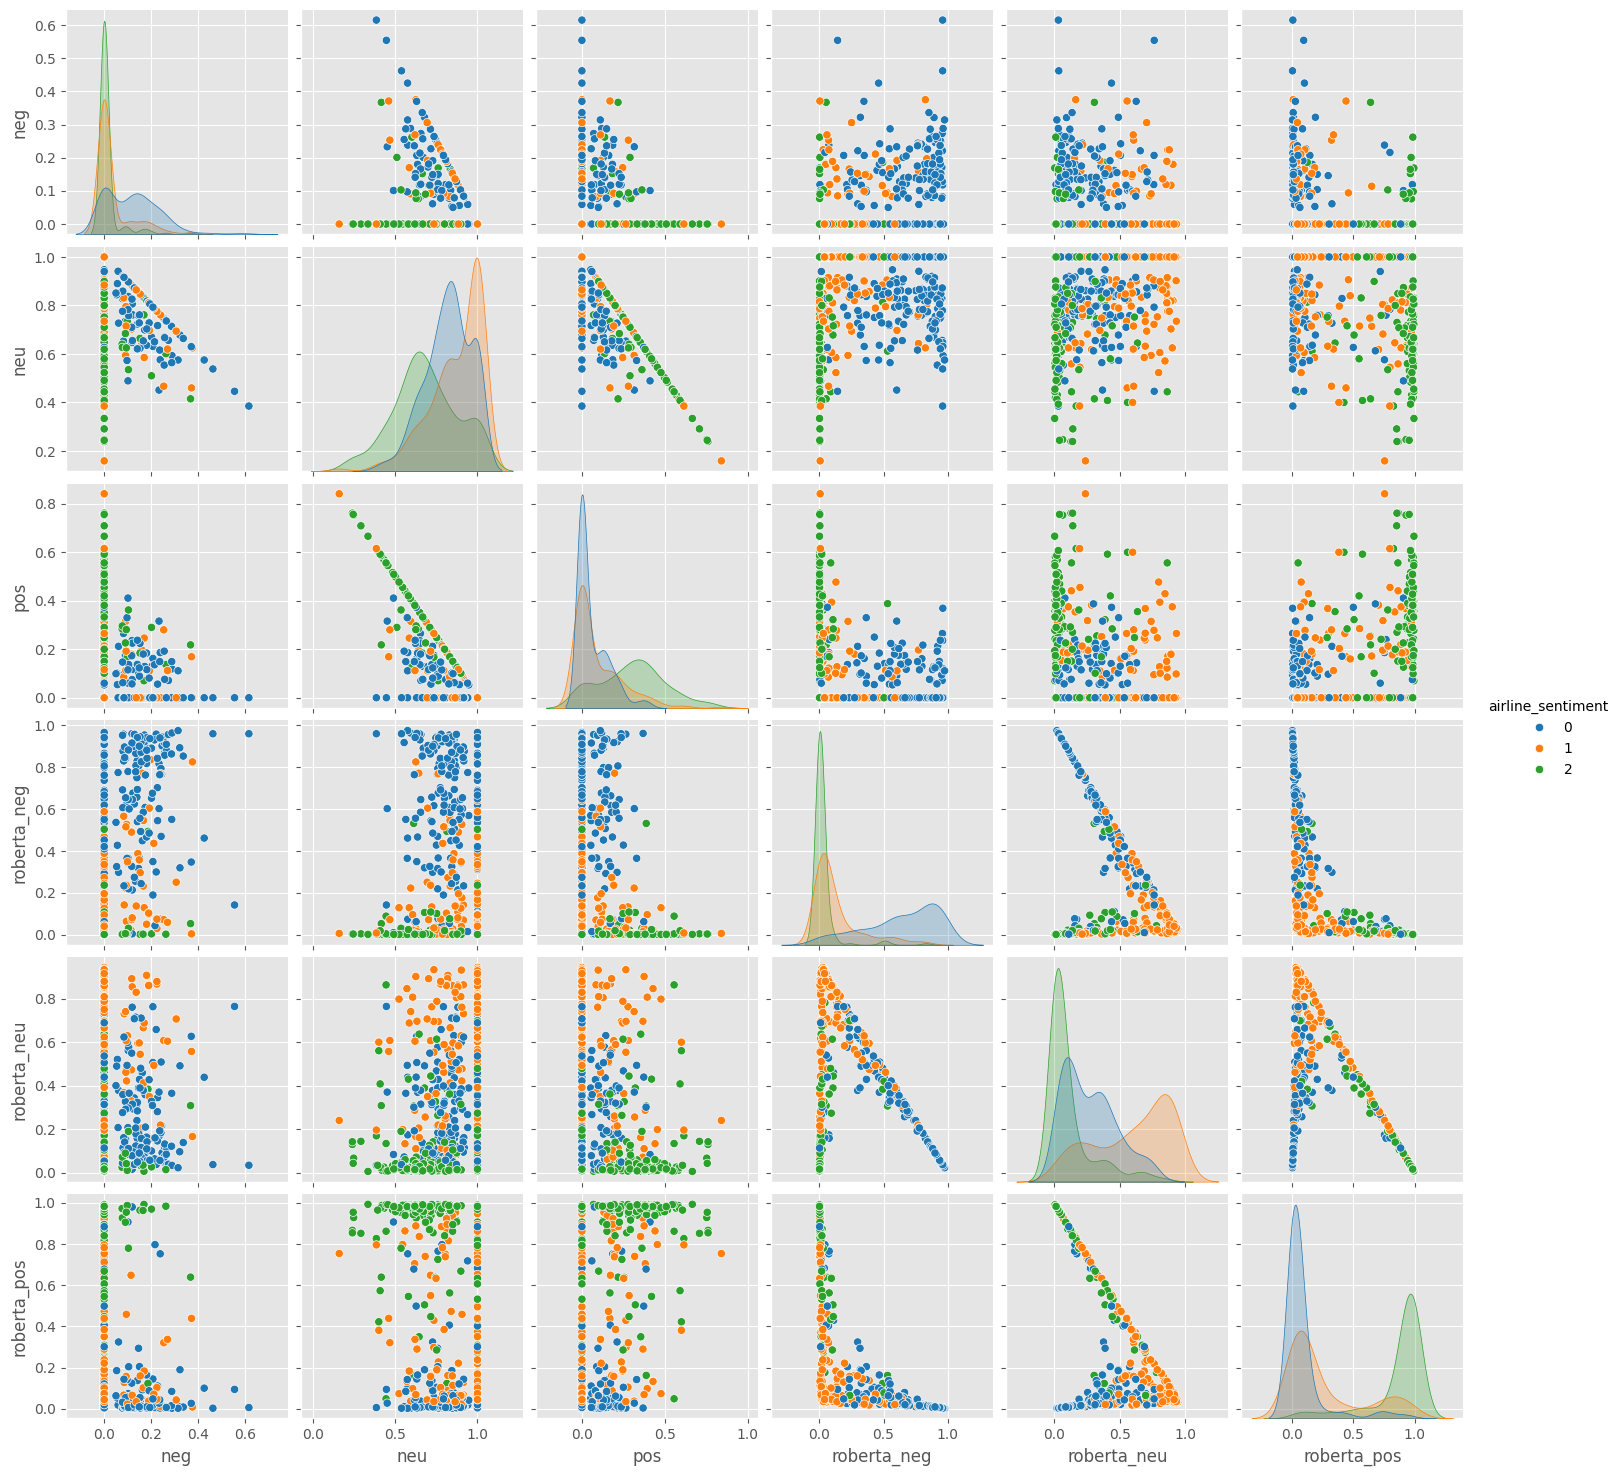

In [ ]:
sns.pairplot(data= res_df, vars =['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu',
       'roberta_pos'], hue = 'airline_sentiment', palette= 'tab10')
plt.show()

1 star review but predicted positive

In [ ]:
res_df.query('airline_sentiment == 0')\
    .sort_values('roberta_pos', ascending= False)['text'].values[0]

"@VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book since last week &amp; the page never loads. thx!"

In [ ]:
res_df.query('airline_sentiment == 0')\
    .sort_values('pos', ascending= False)['text'].values[0]

"@VirginAmerica Just trying to book tickets to NYC and facing super fun broken styling. Don't worry, I'll keep trying :)"

In [ ]:
res_df.query('airline_sentiment == 2')\
    .sort_values('roberta_neg', ascending= False)['text'].values[0]

"@VirginAmerica plus you've added commercials to the experience... tacky."

In [ ]:
res_df.query('airline_sentiment == 2')\
    .sort_values('neg', ascending= False)['text'].values[0]

"@virginamerica Well, I didn't…but NOW I DO! :-D"

In [ ]:
from transformers import pipeline

In [ ]:
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
sent_pipeline('I wanna go out')

[{'label': 'POSITIVE', 'score': 0.9619817733764648}]

In [ ]:
sent_pipeline('miss you')

[{'label': 'POSITIVE', 'score': 0.9993553757667542}]